# Evaluating and Comparing Clustering Algorithims

### Evaluating when we aldready know the right clusters

###### The most common metrics that are used are adjusted rand index (ARI) and normalized mutual information (NMI), which both provide a quantitative measure between 0 and 1.

Let us compare the k-means, agglomerative clustering, and DBSCAN algorithms
using ARI. We also include what it looks like when we randomly assign points to two
clusters for comparison:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split

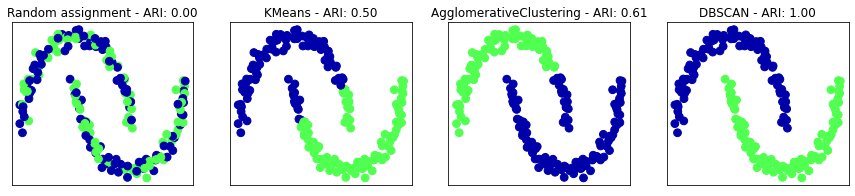

In [3]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

from sklearn.preprocessing import StandardScaler
# Rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics.cluster import adjusted_rand_score

# Create the suplots environment
fig, axes = plt.subplots(1, 4, figsize=(15, 3),subplot_kw={'xticks': (), 'yticks': ()})

# Make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

# Create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# Plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

# Fit and plot the clusters from the algorithims
for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,adjusted_rand_score(y, clusters)))

### Evaluating clusteringnwithout ground truth

###### Scoring metrics for clustering that don’t require ground truth, like the silhouette coefficient. However, these often don’t work well in practice and are not recommended. The silhouette score computes the compactness of a cluster, where higher is better, with a perfect score of 1. While compact clusters are good, compactness doesn’t allow for complex shapes.

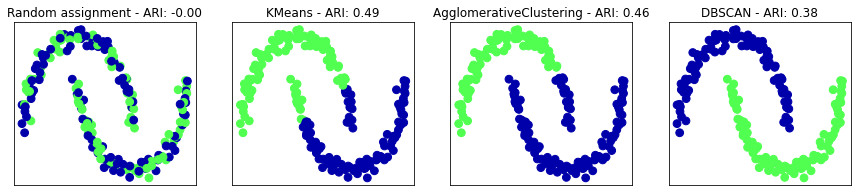

In [4]:
from sklearn.metrics.cluster import silhouette_score

# Create the suplots environment
fig, axes = plt.subplots(1, 4, figsize=(15, 3),subplot_kw={'xticks': (), 'yticks': ()})

# Make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

# Create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# Plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(silhouette_score(X_scaled, random_clusters)))

# Fit and plot the clusters from the algorithims
for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

As you can see, k-means gets the highest silhouette score, even though the result produced by DBSCAN is very accurate.

Robustness-based clustering metrics are better at evaluation. These run an algorithm after adding some noise to the data, or using different parameter settings, and compare the outcomes. The idea is that if many algorithm parameters and many perturbations of the data return the same result, it is likely to be trustworthy. However, they are not implemented in scikit-learn as of yet.